<a href="https://colab.research.google.com/github/maggie8801/HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x:'%.2f'% x)

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-10 08:56:09--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.101, 173.194.210.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ka7fdgpoilp26apiqs4ies07s8iorr6k/1639126500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-10 08:56:10--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ka7fdgpoilp26apiqs4ies07s8iorr6k/1639126500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c13::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Jourdeness/data3_project.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,1404435.00,1404435.00,1403724.00
mean,17.19,2058.17,9100001308747.95
std,27.39,3036.06,930473.55
min,-744.00,-55741.00,9100000000061.00
25%,8.00,558.00,9100000403329.00
50%,8.00,1054.00,9100001231556.00
75%,8.00,2192.00,9100002187647.00
max,7640.00,209559.00,9100003171280.00


In [ ]:
data.isna().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [ ]:
data.drop(data[data['CustomerID'].isnull()].index, inplace=True)
data.shape

(1403724, 10)

In [ ]:
data.loc[(data['Quantity']<0) | (data['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
19,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-56.00,2019-01-01,-1006.00,9100000045758.00,中區,2001-05-20,2012-07-17
20,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-8.00,2019-01-01,-205.00,9100000045758.00,中區,2001-05-20,2012-07-17
252,PS5381011345,KQ03,玫瑰晶萃露15ml,-8.00,2019-01-01,-1501.00,9100000356694.00,中區,2002-02-03,2012-10-06
253,PS5381011345,KQ03,玫瑰晶萃露15ml,-8.00,2019-01-01,-1501.00,9100000356694.00,中區,2002-02-03,2012-10-06
...,...,...,...,...,...,...,...,...,...,...
1404039,PS5217034487,JAA3G3,膠原蛋白青春精華94%原液60ml,-8.00,2020-12-31,-2031.00,9100003026129.00,台北B區,2020-12-10,2020-11-23
1404040,PS5217034487,JAA3G2,玻尿酸超保濕精華96%原液60ml,-8.00,2020-12-31,-2032.00,9100003026129.00,台北B區,2020-12-10,2020-11-23
1404192,PR9310000260,ENAA01B002,新逆時光藍新寶石亮白全臉單堂(單堂會員),-48.00,2020-12-31,-12941.00,9100002311295.00,佐登微爾,2018-05-05,2017-04-16
1404193,PR9310000260,ENBA01B002,新晶透亮白超皮秒透亮美肌局部單堂(單堂會員),-48.00,2020-12-31,-9941.00,9100002311295.00,佐登微爾,2018-05-05,2017-04-16


In [ ]:
data['Revenue'] = data['Quantity'] * abs(data['UnitPrice'])
data['Revenue']

0          10072.00
1           6712.00
2           6712.00
3         -12008.00
4           5376.00
             ...   
1404430    47136.00
1404431     2472.00
1404432     8752.00
1404433     2640.00
1404434     3528.00
Name: Revenue, Length: 1403724, dtype: float64

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,1403724.00,1403724.00,1403724.00,1403724.00
mean,17.18,2058.70,9100001308747.95,82668.84
std,26.34,3035.94,930473.55,922440.49
min,-744.00,-55741.00,9100000000061.00,-41471304.00
25%,8.00,558.00,9100000403329.00,4672.00
50%,8.00,1057.00,9100001231556.00,8752.00
75%,8.00,2203.00,9100002187647.00,25904.00
max,3640.00,209559.00,9100003171280.00,702441768.00


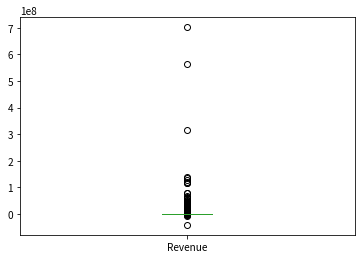

In [ ]:
data['Revenue'].plot.box()

In [ ]:
data1 = data.copy()

In [ ]:
#用IQR概念去除Outlier
def outlier(datacolumn):
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  lower_range = Q1-1.5*IQR
  high_range = Q3+1.5*IQR
  return lower_range, high_range

lower, higher = outlier(data1['Revenue'])
data1[(data1['Revenue']<lower) | (data1['Revenue']>higher)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
9,PS5262016031,HA89A01,肌因彈潤課程單堂,48.00,2019-01-01,9559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,458832.00
10,PS5262016032,HB90A01,全背順氣活力SPA課程單堂,96.00,2019-01-01,11559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,1109664.00
13,PS530A050714,FB40A01,旗艦暖宮腹活SPA課程單堂,96.00,2019-01-01,13259.00,9100002554883.00,中區,2018-10-18,2018-10-18,1272864.00
19,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-56.00,2019-01-01,-1006.00,9100000045758.00,中區,2001-05-20,2012-07-17,-56336.00
31,PS5213017253,HA50A01,胜肽美顏SPA護理單堂,48.00,2019-01-01,6059.00,9100001531076.00,台北B區,2013-11-23,2013-04-09,290832.00
...,...,...,...,...,...,...,...,...,...,...,...
1404400,PS5324024939,JAA3G2,玻尿酸超保濕精華96%原液60ml,16.00,2020-12-31,4239.00,9100000043037.00,中區,2004-11-11,2012-07-23,67824.00
1404401,PS5324024939,KQ02,玫瑰晶萃活膚液130ml,24.00,2020-12-31,5395.00,9100000043037.00,中區,2004-11-11,2012-07-23,129480.00
1404418,PS5324024940,KQ06,玫瑰晶萃瞬效霜30ml,16.00,2020-12-31,4083.00,9100000706055.00,中區,2011-12-21,2014-03-10,65328.00
1404421,PS5324024940,MAA7G1,白金密集煥白面膜18ml*6pcs,32.00,2020-12-31,6923.00,9100000706055.00,中區,2011-12-21,2014-03-10,221536.00


In [ ]:
data1.drop(data1[(data1['Revenue']<lower) | (data1['Revenue']>higher)].index, inplace=True)
data1.shape

(1181196, 11)

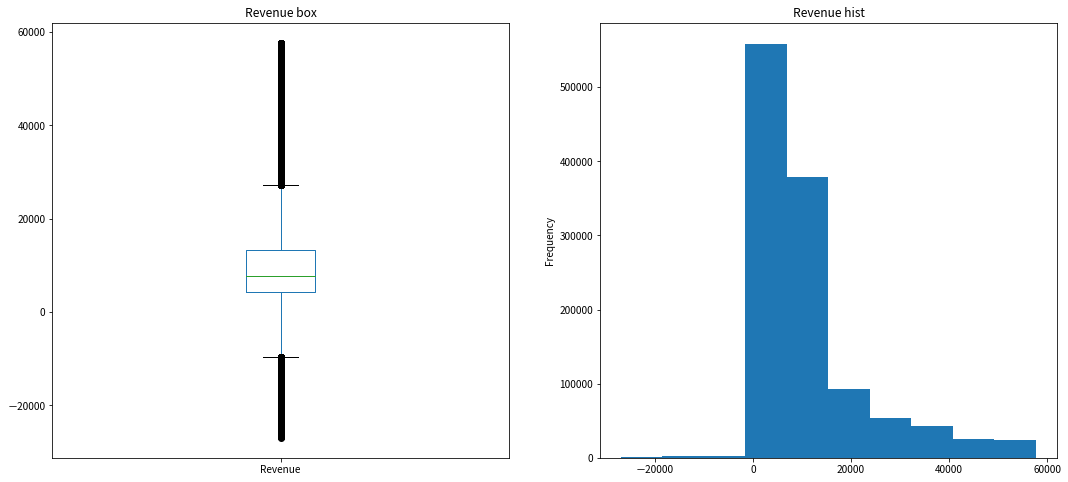

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
data1['Revenue'].plot.box(ax=ax[0])
ax[0].set_title('Revenue box')
data1['Revenue'].plot.hist(ax=ax[1])
ax[1].set_title('Revenue hist')
plt.show()

### 請畫出每個區域的收入分布圖(條狀圖)

In [ ]:
data1.Country.value_counts

<bound method IndexOpsMixin.value_counts of 0          中區
1          中區
2          中區
3          中區
4          南區
           ..
1404430    中區
1404431    竹區
1404432    竹區
1404433    竹區
1404434    竹區
Name: Country, Length: 1181196, dtype: object>

In [ ]:
country_revenue = data1.groupby(['Country'])['Revenue'].sum().reset_index()
country_revenue

,Country,Revenue
0,中區,2823219968.00
1,佐登微爾,62912024.00
2,南區,1397659152.00
3,台北A區,2175803848.00
4,台北B區,1779395376.00
5,彰雲區,1232884144.00
6,竹區,1372911816.00
7,總管理處,60226184.00
8,高屏全區,2134883560.00


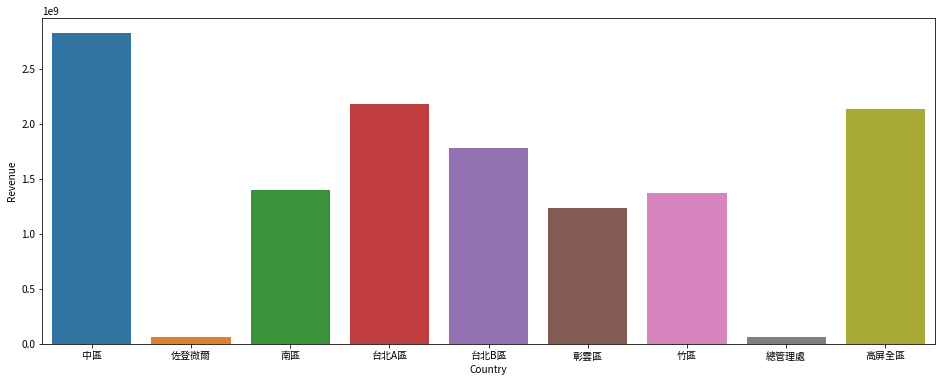

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='Revenue', data=country_revenue)
plt.show()

### 找出總收益最高的產品或課程，並用圓餅圖與折線圖呈現在每個地區的收入分布狀況

In [ ]:
find_best_revenue = data1.groupby(['Description'])['Revenue'].sum().reset_index()
find_best_revenue

,Description,Revenue
0,(3.0 )腸道淨化3.0課程單堂,42561328.00
1,(3.0)旗艦腸道淨化3.0課程單堂,703856.00
2,(VIP)足部玫瑰晶萃瞬效保養課程單堂,12272.00
3,(寵愛御藏)肌因彈潤課程單堂,3026632.00
4,(新)溫熱刮痧課程單堂,88386960.00
...,...,...
770,龍血求麗修護霜5ml-贈品,722536.00
771,龍血求麗精油手工皂100g,2753792.00
772,龍血求麗精油護手霜30ml,40624.00
773,３鑽白奢華面膜-10包,13408.00


In [ ]:
find_best_revenue.loc[find_best_revenue['Revenue'].idxmax()]

Description    BA-5肌密抗皺活妍霜60g
Revenue          485392400.00
Name: 37, dtype: object

In [ ]:
best_revenue = data1[data1['Description']=='BA-5肌密抗皺活妍霜60g']
best_revenue

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
584674,PS533A003646,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2019-11-08,5181.00,9100000367072.00,中區,2004-04-03,2012-08-26,41448.00
584752,PS5538009761,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2019-11-08,5181.00,9100000657838.00,高屏全區,2011-05-13,2012-10-01,41448.00
584962,PS5141023465,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2019-11-08,5979.00,9100001112619.00,台北A區,2009-04-06,2012-10-05,47832.00
584964,PS5141023465,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2019-11-08,5979.00,9100001112619.00,台北A區,2009-04-06,2012-10-05,47832.00
585050,PS5529019594,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2019-11-08,5181.00,9100001277202.00,高屏全區,2005-07-09,2014-03-25,41448.00
...,...,...,...,...,...,...,...,...,...,...,...
1402421,PS5544004064,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2020-12-31,6449.00,9100001244921.00,高屏全區,2002-10-04,2012-11-04,51592.00
1402423,PS5544004064,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2020-12-31,6449.00,9100001244921.00,高屏全區,2002-10-04,2012-11-04,51592.00
1402954,PS5373022673,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2020-12-31,6449.00,9100000262834.00,彰雲區,2005-10-22,2012-08-20,51592.00
1403019,PS5373022675,MAB6G2,BA-5肌密抗皺活妍霜60g,8.00,2020-12-31,6387.00,9100000262834.00,彰雲區,2005-10-22,2012-08-20,51096.00


In [ ]:
best_revenue_in_country = best_revenue.groupby(['Country'])['Revenue'].sum().reset_index()
best_revenue_in_country

,Country,Revenue
0,中區,113775752.00
1,南區,55841776.00
2,台北A區,84680112.00
3,台北B區,57918496.00
4,彰雲區,41793560.00
5,竹區,72078616.00
6,總管理處,3637976.00
7,高屏全區,55666112.00


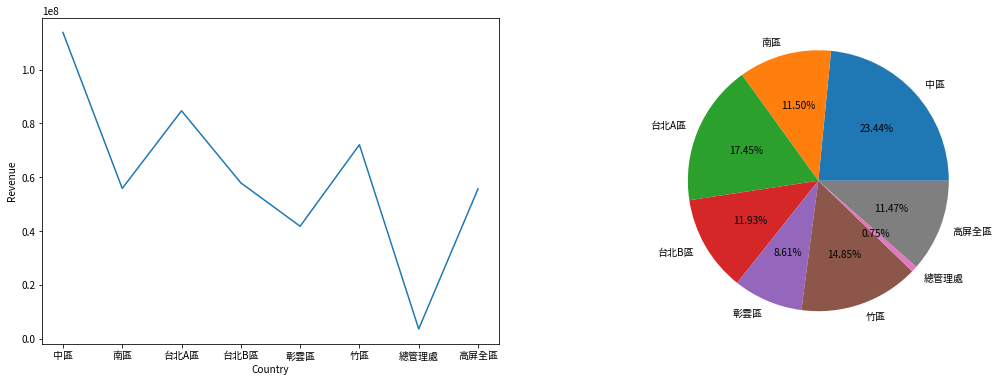

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
plt.pie(best_revenue_in_country['Revenue'], labels=best_revenue_in_country['Country'], autopct='%1.2f%%')
sns.lineplot(x='Country', y='Revenue', data=best_revenue_in_country, ax=ax[0])
plt.show()

### 用折線圖展示春、夏、秋、冬每個季節購買的人數與收入

In [ ]:
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1181196 non-null  object        
 1   StockCode          1181196 non-null  object        
 2   Description        1181196 non-null  object        
 3   Quantity           1181196 non-null  float64       
 4   InvoiceDate        1181196 non-null  datetime64[ns]
 5   UnitPrice          1181196 non-null  float64       
 6   CustomerID         1181196 non-null  float64       
 7   Country            1181196 non-null  object        
 8   member_start_date  1144520 non-null  object        
 9   first_trans_date   1177960 non-null  object        
 10  Revenue            1181196 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 108.1+ MB


In [ ]:
data1.loc[(data1.InvoiceDate.dt.month>=3) & (data1.InvoiceDate.dt.month<=5), 'Season'] = '春'
data1.loc[(data1.InvoiceDate.dt.month>=6) & (data1.InvoiceDate.dt.month<=8), 'Season'] = '夏'
data1.loc[(data1.InvoiceDate.dt.month>=9) & (data1.InvoiceDate.dt.month<=11), 'Season'] = '秋'
data1.loc[(data1.InvoiceDate.dt.month>=12) | (data1.InvoiceDate.dt.month<=2), 'Season'] = '冬'
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Season
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,冬
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,冬
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,冬
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,冬
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,冬
...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,冬
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,冬
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,冬
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,冬


#### 畫圖作法1(較難設定legend)

In [ ]:
season_revenue = data1.groupby(['Season'])['Revenue'].sum().reset_index()
season_revenue

,Season,Revenue
0,冬,2978176952.00
1,夏,3099277400.00
2,春,3571373040.00
3,秋,3391068680.00


In [ ]:
season_visit = data1.groupby(['Season'])['CustomerID'].count().reset_index()
season_visit = season_visit.rename(columns={'CustomerID':'Person-times'})
season_visit

,Season,Person-times
0,冬,246592
1,夏,300898
2,春,346370
3,秋,287336


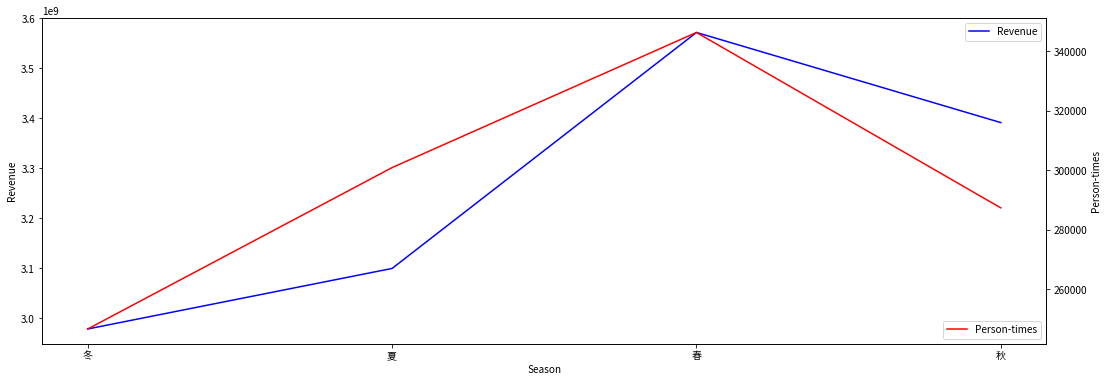

In [ ]:
figure, ax1 = plt.subplots(figsize=(18,6))
sns.lineplot(ax=ax1, x='Season', y='Revenue', data=season_revenue, color='blue') 
plt.legend(labels=['Revenue'], loc=1)
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, x='Season', y='Person-times', data=season_visit, color='red')
plt.legend(labels=['Person-times'], loc=4)
plt.show()

#### 畫圖作法2(程式碼較簡單但圖案不漂亮)

In [ ]:
season_visit_revenue = data1.groupby(['Season'])['CustomerID'].count().reset_index()
season_visit_revenue = season_visit_revenue.rename(columns={'CustomerID':'Person-times'})
season_visit_revenue['Revenue'] = season_revenue['Revenue']
season_visit_revenue

,Season,Person-times,Revenue
0,冬,246592,2978176952.00
1,夏,300898,3099277400.00
2,春,346370,3571373040.00
3,秋,287336,3391068680.00


In [ ]:
season_visit_revenue.index = season_visit_revenue['Season']
season_visit_revenue = season_visit_revenue.drop('Season', axis=1)
season_visit_revenue

,Person-times,Revenue
Season,,
冬,246592,2978176952.00
夏,300898,3099277400.00
春,346370,3571373040.00
秋,287336,3391068680.00


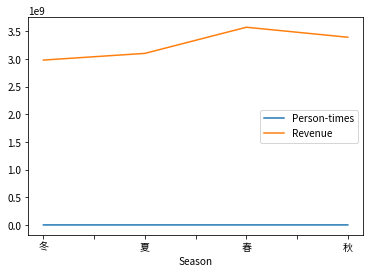

In [ ]:
season_visit_revenue.plot()

#### 轉換季節的失敗程式碼(純作業紀錄)

In [ ]:
#失敗1
#def season_treatment(datecolumn):
# if data2[(data1.InvoiceDate.dt.month>=3) & (data1.InvoiceDate.dt.month<=5)]:
#  return '春'
#  if data2[(data1.InvoiceDate.dt.month>=6) & (data1.InvoiceDate.dt.month<=8)]:
#   return '夏'
# if data2[(data1.InvoiceDate.dt.month>=9) & (data1.InvoiceDate.dt.month<=11)]:
#   return '秋'
# if data2[(data1.InvoiceDate.dt.month>=12) | (data1.InvoiceDate.dt.month<=2)]:
#   return '冬'
#season = season_treatment(data2['InvoiceDate'])
#season

#失敗2
#season = {(data1.loc[(data1.InvoiceDate.dt.month>=3)&(data1.InvoiceDate.dt.month<=5)]):'春',(data1.loc[(data1.InvoiceDate.dt.month>=6)&(data1.InvoiceDate.dt.month<=8)]):'夏',(data1.loc[(data1.InvoiceDate.dt.month>=9)&(data1.InvoiceDate.dt.month<=11)]):'秋',(data1.loc[(data1.InvoiceDate.dt.month>=12)|(data1.InvoiceDate.dt.month<=2)]):'冬'}
#data2['Season'] = data2['Season'].map(season)
#data2